In [1]:
import pandas as pd

df = pd.read_csv("./data/user69618145_workout_history.csv")

df.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (km),Workout Time (seconds),Avg Pace (min/km),Max Pace (min/km),Avg Speed (km/h),Max Speed (km/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"July 3, 2025","July 3, 2025",Run,403,5.163532,2365,7.633794,0.395288,7.859763,151.788015,0.0,6187.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8625411321
1,"July 2, 2025","July 2, 2025",Run,414,5.339546,2473,7.719543,0.400474,7.772504,149.822362,0.0,6464.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8624764540
2,"July 1, 2025","July 1, 2025",Run,421,5.380616,2446,7.575571,1.830106,7.920161,32.784912,0.0,6403.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8624078907
3,"June 29, 2025","June 29, 2025",Run,437,5.401184,2227,6.869196,0.735604,8.734618,81.565899,0.0,5882.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8622832763
4,"June 28, 2025","June 28, 2025",Run,436,5.337695,2315,7.223378,0.261140,8.306339,229.762824,0.0,6086.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8622257110


1. Create a standardized date field from "Workout Date"

In [2]:
df["date"] = pd.to_datetime(df["Workout Date"], format='mixed', errors='coerce')
df.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (km),Workout Time (seconds),Avg Pace (min/km),Max Pace (min/km),Avg Speed (km/h),Max Speed (km/h),Avg Heart Rate,Steps,Notes,Source,Link,date
0,"July 3, 2025","July 3, 2025",Run,403,5.163532,2365,7.633794,0.395288,7.859763,151.788015,0.0,6187.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8625411321,2025-07-03
1,"July 2, 2025","July 2, 2025",Run,414,5.339546,2473,7.719543,0.400474,7.772504,149.822362,0.0,6464.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8624764540,2025-07-02
2,"July 1, 2025","July 1, 2025",Run,421,5.380616,2446,7.575571,1.830106,7.920161,32.784912,0.0,6403.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8624078907,2025-07-01
3,"June 29, 2025","June 29, 2025",Run,437,5.401184,2227,6.869196,0.735604,8.734618,81.565899,0.0,5882.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8622832763,2025-06-29
4,"June 28, 2025","June 28, 2025",Run,436,5.337695,2315,7.223378,0.261140,8.306339,229.762824,0.0,6086.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/8622257110,2025-06-28


2. Remove non-run data observations

In [3]:
not_run = df["Activity Type"] != "Run"
df[not_run]

# change 7th Nov 2024 activity type to run
df.loc[df["date"] == "2024-11-07", "Activity Type"] = "Run"

In [4]:
# remove non run observations
df = df[df["Activity Type"] == "Run"]


In [5]:
df = df.drop(["Date Submitted", "Workout Date", "Source", "Avg Heart Rate", "Activity Type"], axis=1)
df.head()


,Calories Burned (kCal),Distance (km),Workout Time (seconds),Avg Pace (min/km),Max Pace (min/km),Avg Speed (km/h),Max Speed (km/h),Steps,Notes,Link,date
0,403,5.163532,2365,7.633794,0.395288,7.859763,151.788015,6187.0,NaN,http://www.mapmyfitness.com/workout/8625411321,2025-07-03
1,414,5.339546,2473,7.719543,0.400474,7.772504,149.822362,6464.0,NaN,http://www.mapmyfitness.com/workout/8624764540,2025-07-02
2,421,5.380616,2446,7.575571,1.830106,7.920161,32.784912,6403.0,NaN,http://www.mapmyfitness.com/workout/8624078907,2025-07-01
3,437,5.401184,2227,6.869196,0.735604,8.734618,81.565899,5882.0,NaN,http://www.mapmyfitness.com/workout/8622832763,2025-06-29
4,436,5.337695,2315,7.223378,0.261140,8.306339,229.762824,6086.0,NaN,http://www.mapmyfitness.com/workout/8622257110,2025-06-28


In [6]:
# Move 'date' column to the beginning
df = df[['date'] + [col for col in df.columns if col != 'date']]

3. Inspect variables for validity

<Axes: xlabel='date', ylabel='Max Speed (km/h)'>

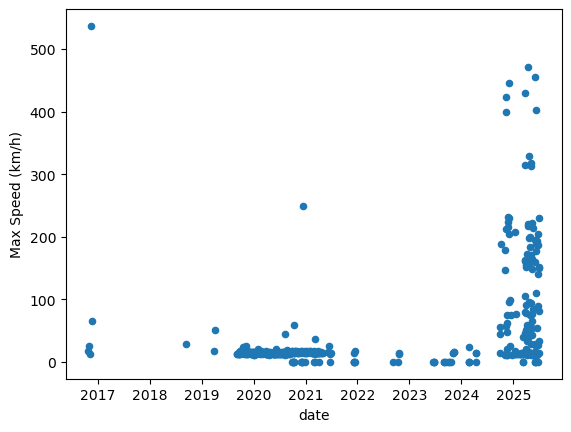

In [7]:
# Visualize max speed to see if its going to be useful
df.plot.scatter(x="date", y="Max Speed (km/h)")

In [8]:
df.sort_values("Max Speed (km/h)", ascending=False).head(4)

,date,Calories Burned (kCal),Distance (km),Workout Time (seconds),Avg Pace (min/km),Max Pace (min/km),Avg Speed (km/h),Max Speed (km/h),Steps,Notes,Link
501,2016-11-11,56,59.857619,130,0.036197,0.111775,1657.592133,536.793473,6466.0,NaN,http://www.mapmyfitness.com/workout/1882720331
67,2025-04-17,435,5.452892,2419,7.392639,0.127312,8.116211,471.281906,6346.0,NaN,http://www.mapmyfitness.com/workout/8515343035
24,2025-06-02,436,5.426628,2196,6.741132,0.131748,8.900541,455.415384,5810.0,Decent,http://www.mapmyfitness.com/workout/8601665533
122,2024-12-05,623,7.703383,3373,7.297756,0.134444,8.221704,446.283966,8859.0,NaN,http://www.mapmyfitness.com/workout/8308218154


In [9]:
# I decided to remove max speed
df = df.drop("Max Speed (km/h)", axis=1)
df.head()

,date,Calories Burned (kCal),Distance (km),Workout Time (seconds),Avg Pace (min/km),Max Pace (min/km),Avg Speed (km/h),Steps,Notes,Link
0,2025-07-03,403,5.163532,2365,7.633794,0.395288,7.859763,6187.0,NaN,http://www.mapmyfitness.com/workout/8625411321
1,2025-07-02,414,5.339546,2473,7.719543,0.400474,7.772504,6464.0,NaN,http://www.mapmyfitness.com/workout/8624764540
2,2025-07-01,421,5.380616,2446,7.575571,1.830106,7.920161,6403.0,NaN,http://www.mapmyfitness.com/workout/8624078907
3,2025-06-29,437,5.401184,2227,6.869196,0.735604,8.734618,5882.0,NaN,http://www.mapmyfitness.com/workout/8622832763
4,2025-06-28,436,5.337695,2315,7.223378,0.261140,8.306339,6086.0,NaN,http://www.mapmyfitness.com/workout/8622257110


4. Inspect Avg Pace for outliers (runs where tracking was not stopped promptly)

In [10]:
# Filter out obviously inaccurate runs
slow_df = df[df['Avg Pace (min/km)'] >= 9.0]  # pace in min/km
slow_df.head()

,date,Calories Burned (kCal),Distance (km),Workout Time (seconds),Avg Pace (min/km),Max Pace (min/km),Avg Speed (km/h),Steps,Notes,Link
14,2025-06-17,345,5.535500,3028,9.102218,5.24592,6.591809,7811.0,NaN,http://www.mapmyfitness.com/workout/8615498795
18,2025-06-07,18,0.002920,426,2431.506253,0.00000,0.024676,12.0,NaN,http://www.mapmyfitness.com/workout/8609777334
23,2025-06-02,14,0.015600,326,348.290359,0.00000,0.172271,26.0,NaN,http://www.mapmyfitness.com/workout/8605910506
26,2025-05-31,22,0.002740,527,3205.598057,0.00000,0.018717,8.0,NaN,http://www.mapmyfitness.com/workout/8599717504
54,2025-05-02,339,5.894737,5322,15.045634,2.12430,3.987874,13335.0,NaN,http://www.mapmyfitness.com/workout/8543973892


In [11]:
# confirm and remove these records
df = df[df["Avg Pace (min/km)"] <= 9.0]
df.head()

,date,Calories Burned (kCal),Distance (km),Workout Time (seconds),Avg Pace (min/km),Max Pace (min/km),Avg Speed (km/h),Steps,Notes,Link
0,2025-07-03,403,5.163532,2365,7.633794,0.395288,7.859763,6187.0,NaN,http://www.mapmyfitness.com/workout/8625411321
1,2025-07-02,414,5.339546,2473,7.719543,0.400474,7.772504,6464.0,NaN,http://www.mapmyfitness.com/workout/8624764540
2,2025-07-01,421,5.380616,2446,7.575571,1.830106,7.920161,6403.0,NaN,http://www.mapmyfitness.com/workout/8624078907
3,2025-06-29,437,5.401184,2227,6.869196,0.735604,8.734618,5882.0,NaN,http://www.mapmyfitness.com/workout/8622832763
4,2025-06-28,436,5.337695,2315,7.223378,0.261140,8.306339,6086.0,NaN,http://www.mapmyfitness.com/workout/8622257110


          date  Calories Burned (kCal)  Distance (km)  Workout Time (seconds)  \
7   2025-06-25                      64       0.000000                     373   
98  2025-03-07                      45       0.000000                     265   
115 2025-01-12                       4       0.000000                      20   
376 2020-04-19                      24       6.443974                      50   
501 2016-11-11                      56      59.857619                     130   

     Avg Pace (min/km)  Max Pace (min/km)  Avg Speed (km/h)   Steps Notes  \
7             0.000000           0.000000          0.000000     0.0   NaN   
98            0.000000           0.000000          0.000000     0.0   NaN   
115           0.000000           3.507870          0.000000     NaN   NaN   
376           0.129320           5.163986        463.965828   782.0   NaN   
501           0.036197           0.111775       1657.592133  6466.0   NaN   

                                               Lin

<Axes: xlabel='Distance (km)', ylabel='Avg Pace (min/km)'>

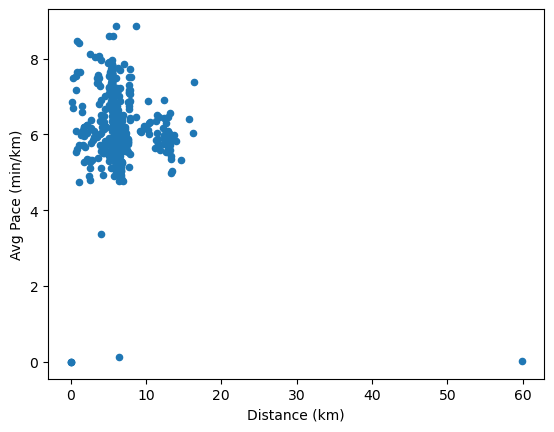

In [12]:
# too_short = df[df['Workout Time (seconds)'] < ]
too_fast = df[df['Avg Pace (min/km)'] < 3]
print(too_fast)

# Visualize max speed to see if its going to be useful
df.plot.scatter(x="Distance (km)", y="Avg Pace (min/km)")


<Axes: xlabel='Distance (km)', ylabel='Avg Pace (min/km)'>

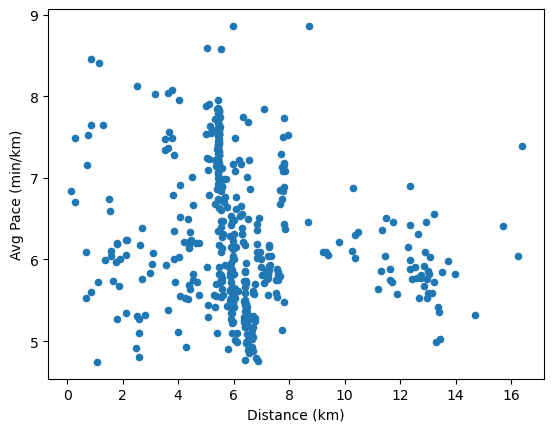

In [79]:
# Remove the too fast ones
df = df[df['Avg Pace (min/km)'] > 4]

# Visualize max speed to see if its going to be useful
df.plot.scatter(x="Distance (km)", y="Avg Pace (min/km)")

In [80]:
# this one seems a bit fast
a_bit_fast = df[df['Avg Pace (min/km)'] < 4]
print(a_bit_fast)

Empty DataFrame
Columns: [date, Calories Burned (kCal), Distance (km), Workout Time (seconds), Avg Pace (min/km), Max Pace (min/km), Avg Speed (km/h), Steps, Notes, Link]
Index: []


In [81]:
too_short = df[df['Distance (km)'] < 1]
print(too_short)


          date  Calories Burned (kCal)  Distance (km)  Workout Time (seconds)  \
152 2024-02-22                      61       0.857040                     435   
163 2023-09-17                      60       0.768211                     347   
165 2023-09-04                      59       0.721540                     310   
166 2023-06-24                      21       0.269399                     121   
183 2021-06-25                      11       0.130915                      56   
213 2021-02-27                      68       0.869990                     399   
239 2020-12-29                      24       0.300860                     121   
304 2020-08-30                      63       0.844460                     284   
312 2020-08-17                      52       0.667670                     244   
313 2020-08-16                      51       0.681290                     226   

     Avg Pace (min/km)  Max Pace (min/km)  Avg Speed (km/h)   Steps Notes  \
152           8.459347         

<Axes: xlabel='Distance (km)', ylabel='Avg Pace (min/km)'>

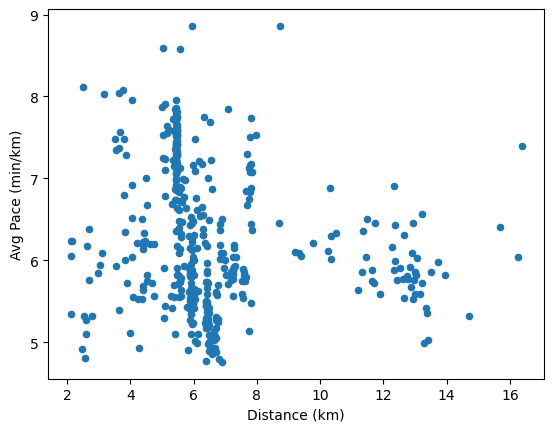

In [82]:
df  = df[df['Distance (km)'] > 2]

# Visualize avg pace over distance
df.plot.scatter(x="Distance (km)", y="Avg Pace (min/km)")

In [85]:
df.count()

date                      424
Calories Burned (kCal)    424
Distance (km)             424
Workout Time (seconds)    424
Avg Pace (min/km)         424
Max Pace (min/km)         424
Avg Speed (km/h)          424
Steps                     424
Notes                     267
Link                      424
dtype: int64

In [84]:
# save to csv
df.to_csv('data/cleaned/running_data.csv', index=False)